# Introduction

The purpose of supply chain management is to deliver the product to the customer safely and completely and to satisfy the customer. The ultimate goal of the supply chain is for the customer to have a good experience, to meet their expectations, and for the company to have more sales.

Analysing a company's supply chain data can help it run more smoothly and efficiently. The supply chain can discover patterns and trends in past shipment data to help predict future needs, prevent disruptions and stockouts, and better manage the company's inventory. Furthermore, data analytics can assist supply chains in optimising their routes, schedules and tracking their performance over time.(DFreight, 2022)

In this report, "Total amount per order", "Order Item Quantity" and "Late Delivery" are considered the three main effective parameters of supply chain management efficiency.

1)Forecasting the "Total amount per order"(or Sale per Customer) is done in order to help the business identify in advance any problems and opportunities related to sales of products.

2)The "Order Item Quantity" (or Demand) forecasting helps in identifying customer purchasing trends and predicting future market demand for products. The company is able to determine which customer segments produce the highest profits, which products receive the most customer orders, and which markets have the highest demand.

3)"Late deliveries" reduce customer retention. It also undermines the customer's trust in the company. As a result, the company loses credibility and profit over time through losing customers. By preventing late delivery, the company may help retain customers, increase customer lifetime value, and increase its ROI.

# Developing the Solution

### Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore") 
import datetime as dt
from datetime import datetime
import plotly.express as px

In [2]:
SC=pd.read_csv("/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv", encoding='latin1')  #I have to use the encoding as latin1 to read this file as there are some special character 

## Descriptive Part

In [3]:
SC.shape  #Checking the lengths of the array dimensions

(180519, 53)

In [4]:
SC.dtypes  #Checking the number of variables and their type

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [5]:
SC.head(10)  #Checking the top 10 rows in the dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [6]:
SC.info()  #Checking the type of column structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
SC.describe()  # Returning statistical description of the data in the Dataset

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


A brief explanation about the values in the table above:

1)According to the information obtained in the previous tables, the values in each row are 180519, by seeing the count row of the above table, it can be concluded "Customer Lname, Customer Zipcode, Order Zipcode, and Product Description" have missing values. Their number will be specified below.

2)The Late Delivery Risk column in this dataset has the values 0 and 1, that is if there is a delay, the number 1 is assigned to the order, and if there is no delay, the number 0 is assigned to the order. According to the table above, the average of this feature is 0.548. So, it can be concluded that the number of delays is higher and this can lead to the loss of customers and, consequently, the loss of profit.

# Data Cleaning

### Missing Values

In [8]:
np.sum(SC.isna()) #Checking the number of missing values for each variable

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


A summary of what I was done in this part:

1-The dataset includes some missing values: Customer Lname, Customer Zipcode, Order Zipcode, and Product Description. These missing values should be replaced or removed.

2-I decided to replace the missing values of Customer Name, Customer Zipcode and Order Zipcode with the "NotDetermined" and "0" respectively, and drop the Product Description columns.

3-Because Customer Zipcode and Order Zipcode are not important in modelling the response variable, the value 0 can be placed instead of their missing values.

4-Since there are 8 customers whose last names were missing. Instead of these missing values, I inserted the words "NotDetermined", and then I created a new column with "Customer Full Nam".

In [9]:
SC['Customer Zipcode']=SC['Customer Zipcode'].fillna(0)

In [10]:
SC['Order Zipcode']=SC['Order Zipcode'].fillna(0)

In [11]:
SC['Customer Fname']=SC['Customer Fname'].fillna("NotDetermined")

In [12]:
SC['Customer Full Name'] = SC['Customer Fname'].astype(str)+SC['Customer Lname'].astype(str)

### Cleaning

In [13]:
SCData=SC.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
SCData.shape

(180519, 44)

In [14]:
SCData.columns  #Checking column names after dropping

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

In [15]:
SCData.columns = [col.lower().replace(' ', '_') for col in SCData.columns]
SCData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [16]:
SCData.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

# Data Visualisation

To find important parameters, data correlation is performed.

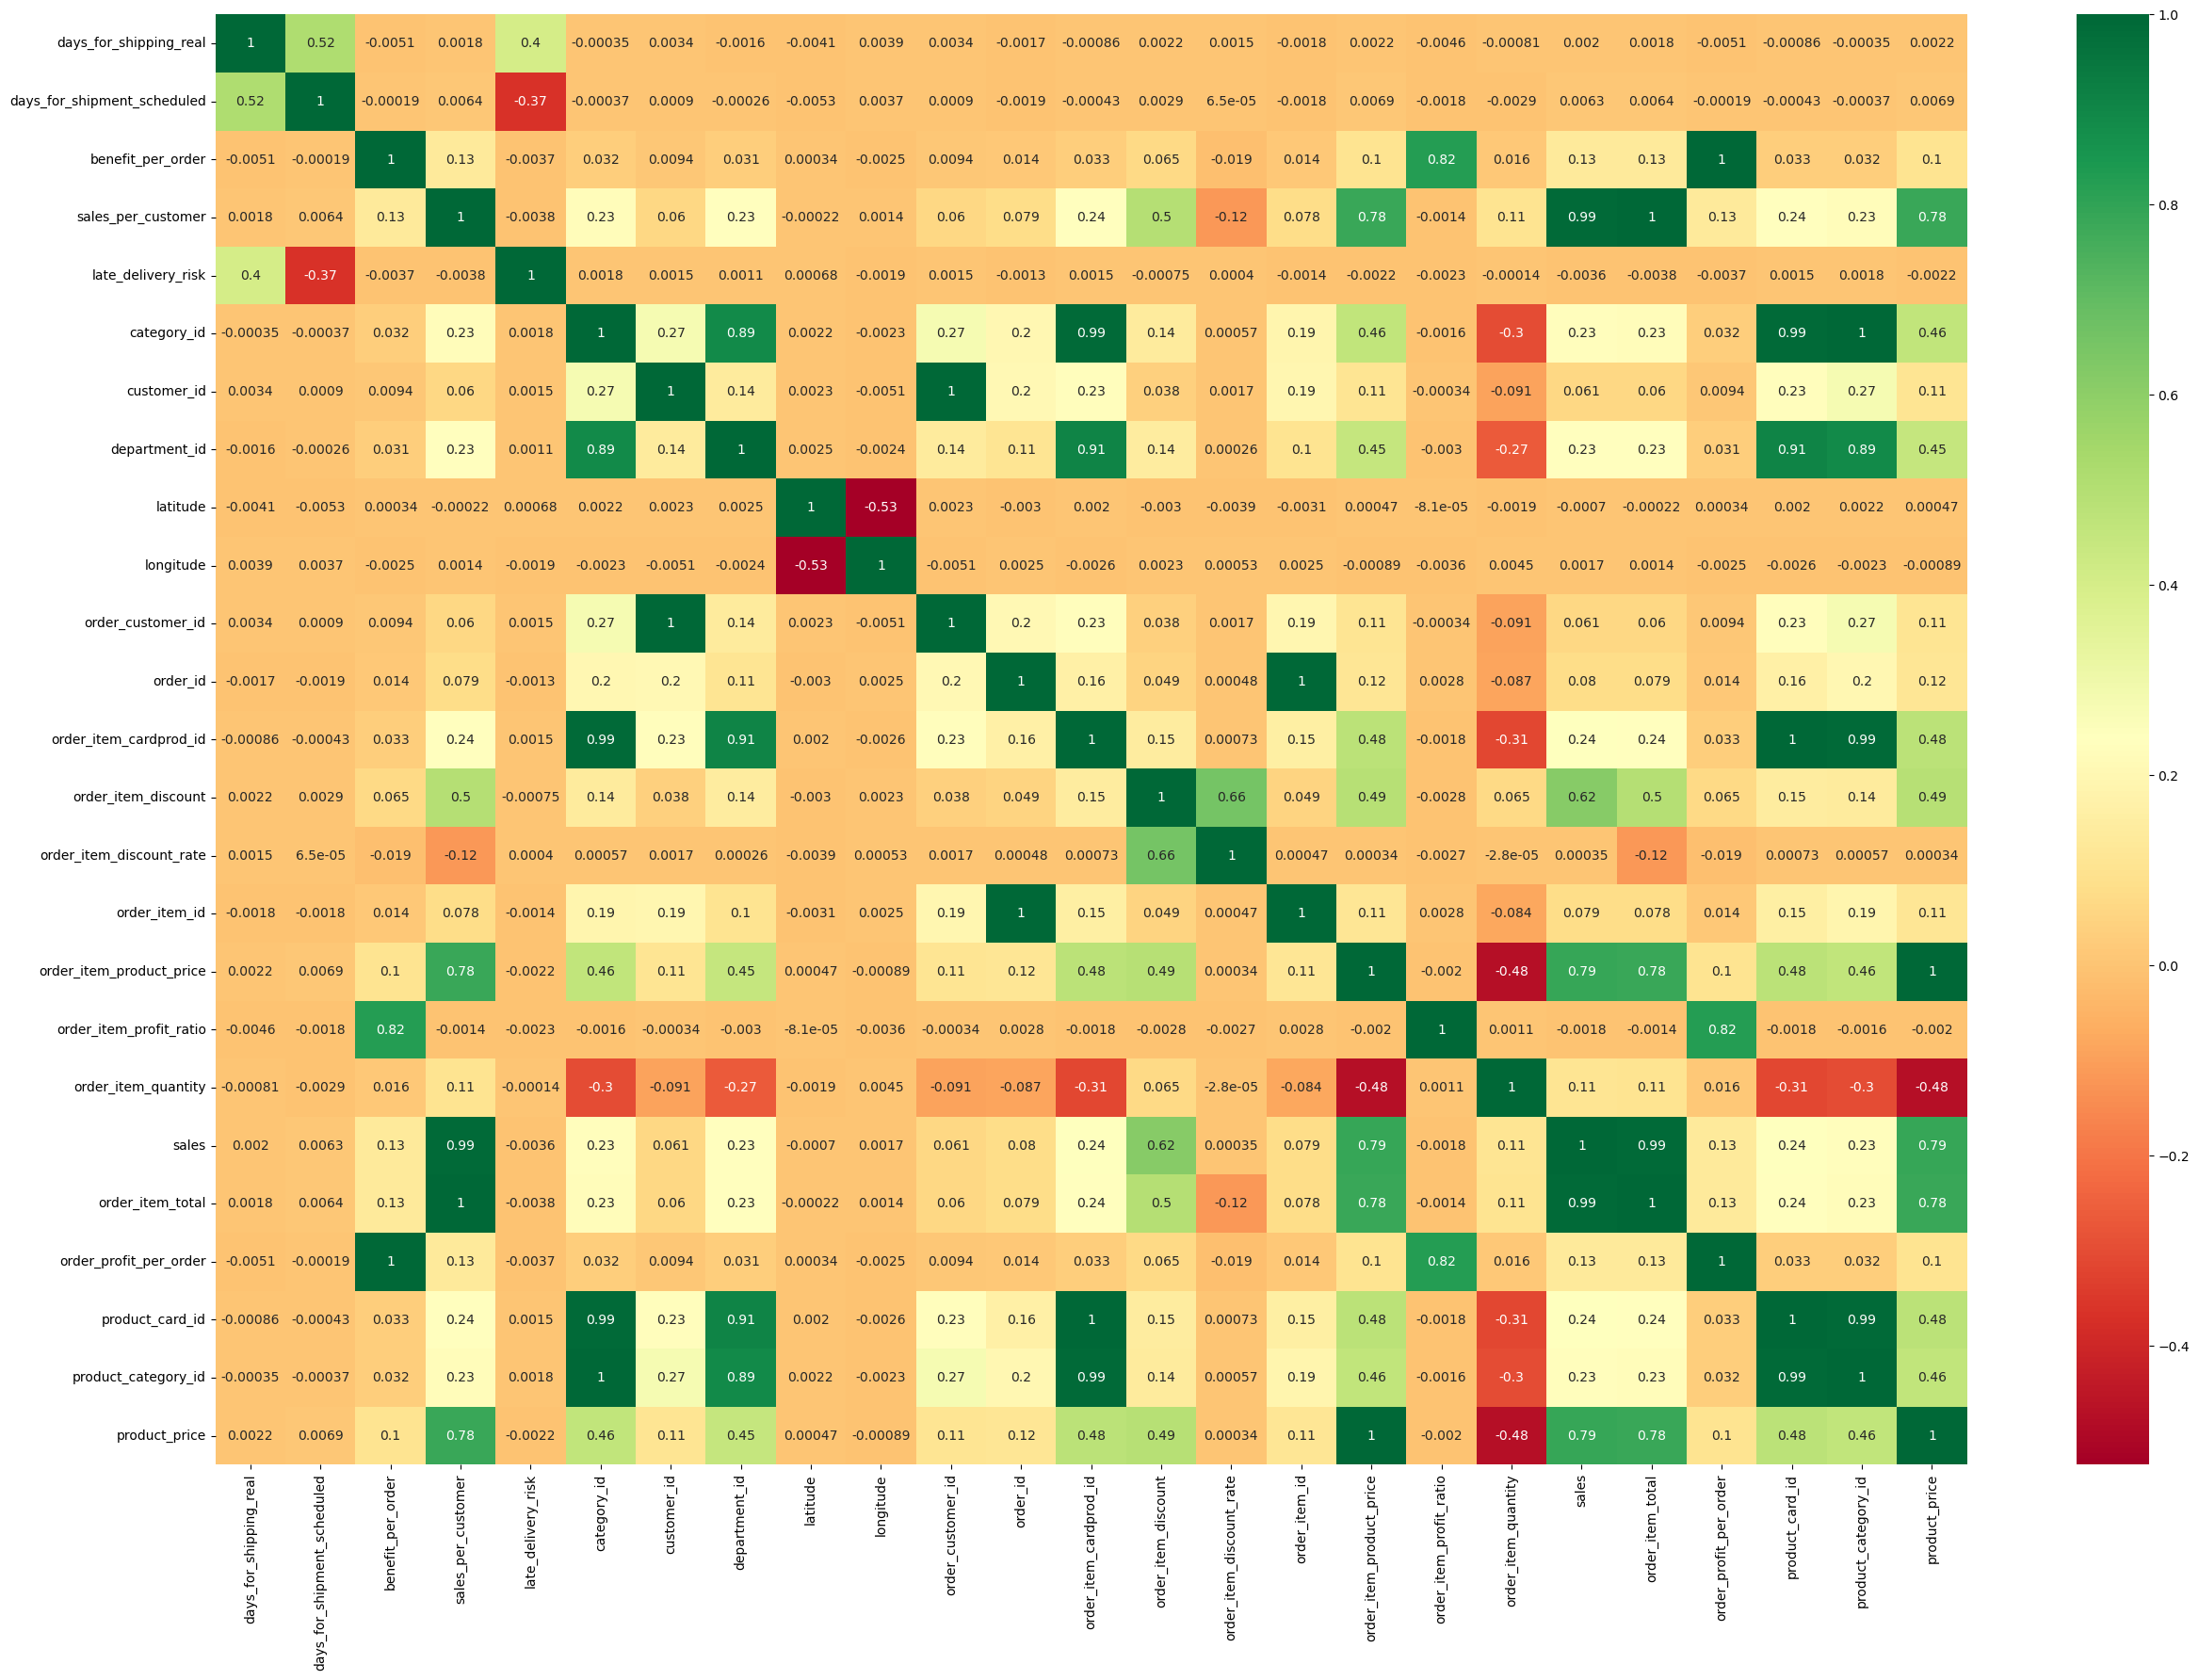

In [17]:
corrmap = SCData.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(SCData[top].corr(),annot=True,cmap="RdYlGn")

Each cell is marked with a color ranging from -1 to +1. (I have used green color for positive numbers and red color for negative numbers.) The closer this number is to -1, it means that two characteristics are inversely related to each other, and the closer this number is to +1, it means that two characteristics are directly related to each other.

It can be easily recognized from the Heatmap diagram:

1-Columns that are similar with same values but with different metadata (duplicate columns)

*Benefit per order, Order Profit per order

*Sales per customer, Sales, Order Item Total

*Category ID, Product Category ID, Order Customer ID, Order Item Category ID, Product card ID

*Order Item Product Price,Product Price

2-Unwanted features(null or less correlated values)

*Product Description

*Product Status

In order to correctly identify the relationship between the features in the heatmap chart. This time, I only included a few features in the diagram.

<Axes: >

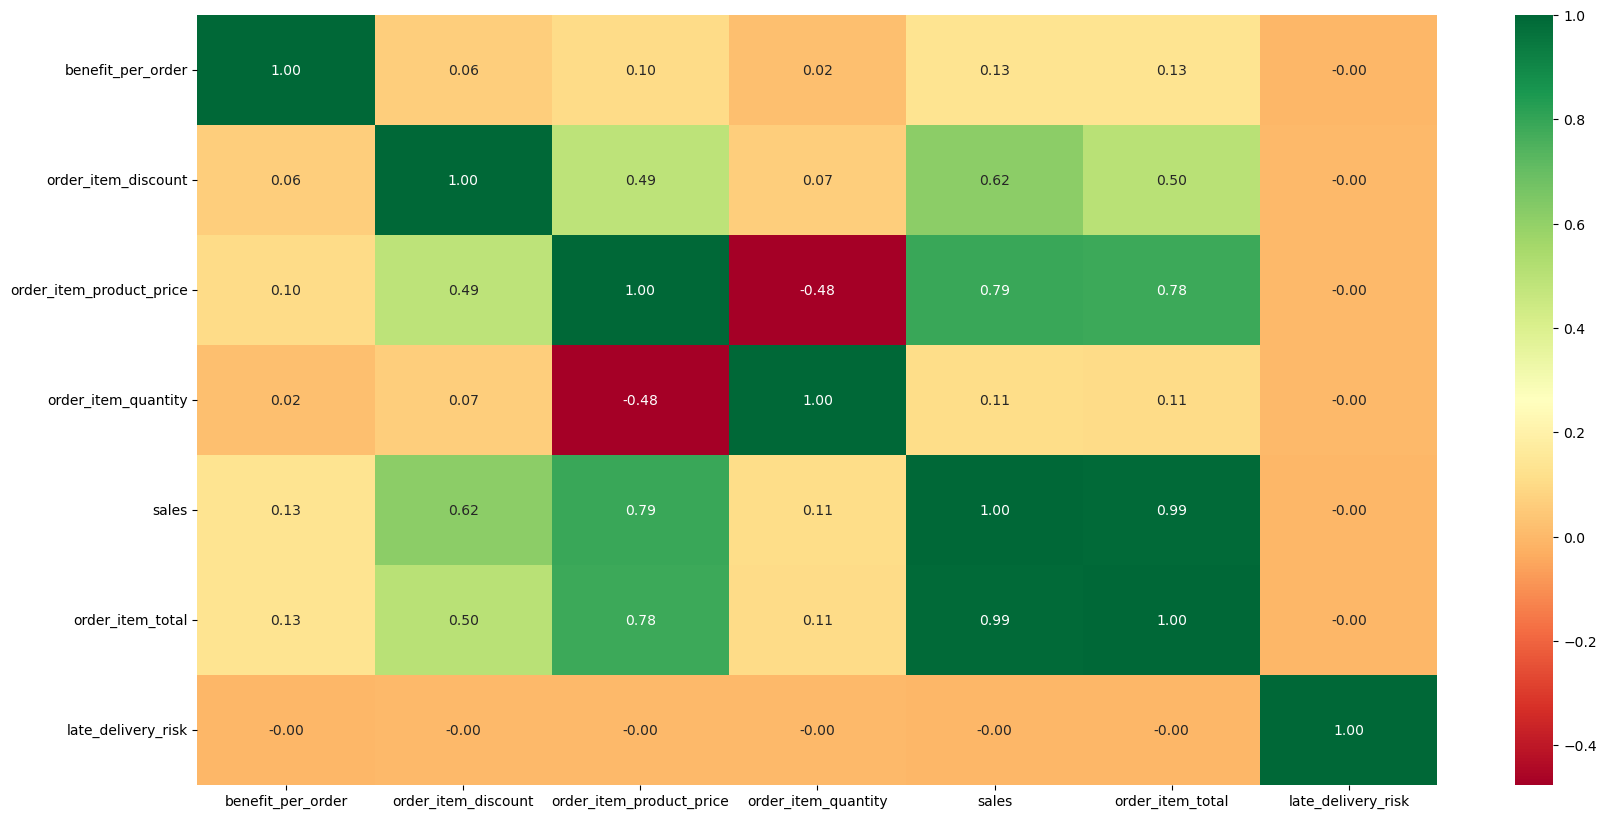

In [18]:
SC_features=SCData[['shipping_date_dateorders', 'benefit_per_order',
       'order_date_dateorders',
       'order_item_discount', 
       'order_item_product_price', 
       'order_item_quantity', 'sales', 'order_item_total','late_delivery_risk']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(SC_features.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")

As shown in the heatmap chart:

1-'order_item_total' has a direct relationship with order_item_discount', 'order_item_product_price', 'order_item_quantity', and 'sales'.

The following formula, which was discovered through dataset analysis, can explain the cause:

Order Item Total = Sales - Order Item Discount

2-'sales' has a direct relationship with 'order_item_discount', and 'order_item_product_price'.

The following relationships help to explain the cause:

Sales = Product Price * Order Item Quantity

Order Item Discount = Sales * Order Item Discount Rate

3-The relationship between 'order_item_quantity' and 'order_item_product_price' is inverse.

Upon reviewing the dataset, it was found that products with high prices only had one order, while products priced between 10 and 100 had five orders. In other words, only one order has been made for the expensive items.

***GroupBy:***

Customers, Market, Products, Shipment Modes, and Payment Methods were divided into distinct groups using the "group by" method, and in each category, the key elements like Sales, Earnings per order placed, Total amount per order, etc. were examined.

In [19]:
Delivery=SCData.groupby('delivery_status')
Market = SCData.groupby('market') 
Region = SCData.groupby('order_region')
Customer=SCData.groupby('customer_segment')
Category=SCData.groupby('category_name')
Shipping=SCData.groupby('shipping_mode')
Region=SCData.groupby('order_region')

### Customer Segment Analysis

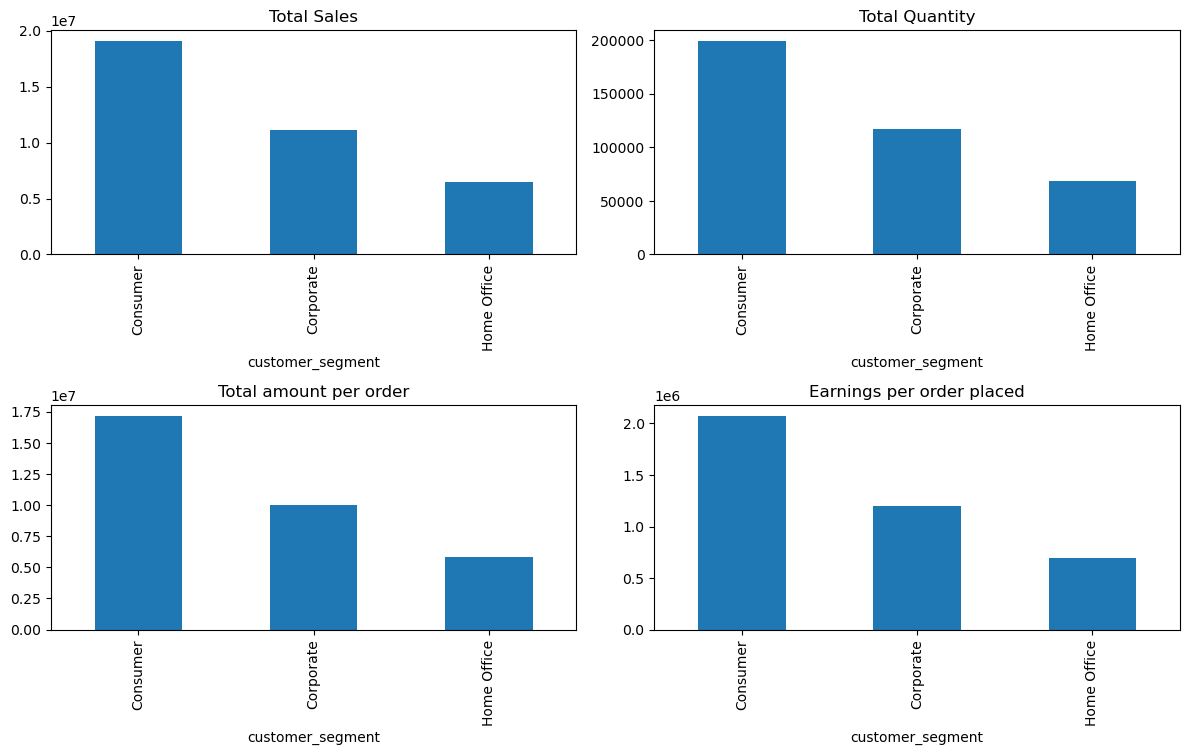

In [20]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Customer['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

plt.subplot(4, 2, 2)
Customer['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

plt.subplot(4, 2, 3)
Customer['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total amount per order")

plt.subplot(4, 2, 4)
Customer['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()

data_Customer_Segment=SCData.groupby(['customer_segment'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Customer_Segment, values='order_item_quantity', names= 'customer_segment' , title= 'Number of Orders per Customer Segments', 
       color='customer_segment',
             color_discrete_map={'Consumer':'darkblue',
                                 'Corporate':'cyan',
                                 'Home Office':'royalblue'})

The consumer category has the biggest share, as seen in all the above charts. So, accurate demand forecasting and on-time delivery are very important for this group of customers, as the risk of late delivery leads to lost profits.

### Market Analysis

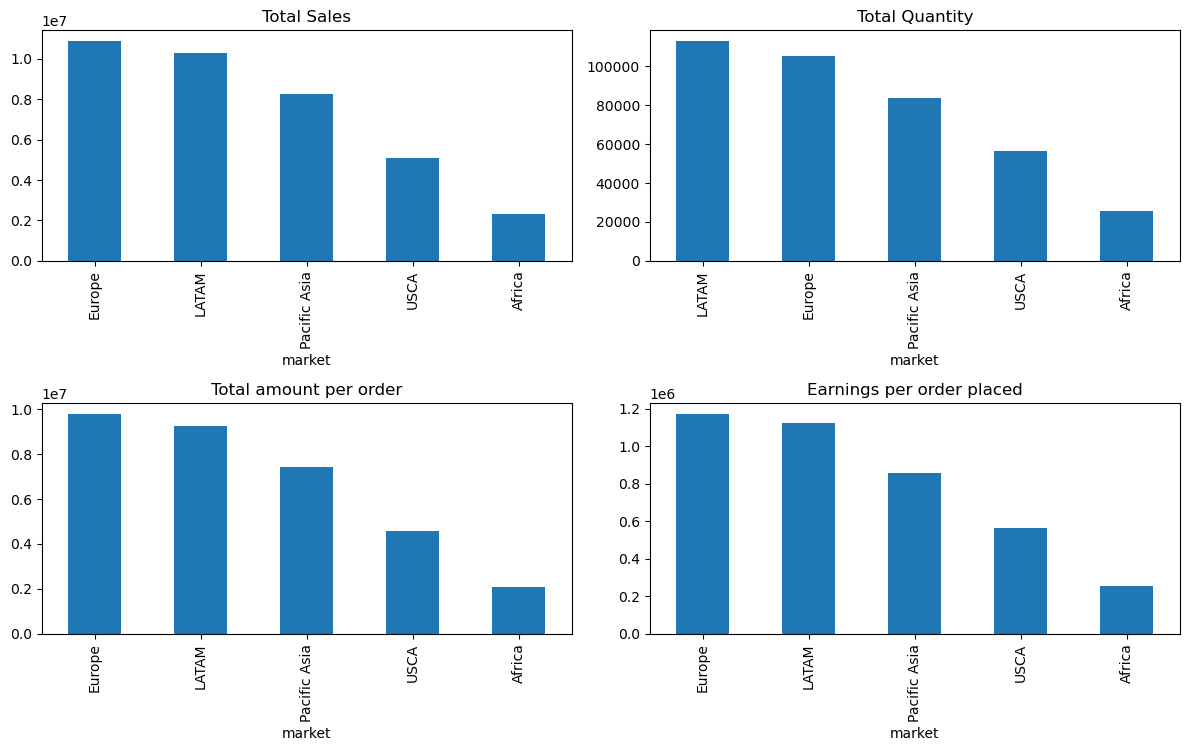

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Market['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

plt.subplot(4, 2, 2)
Market['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

plt.subplot(4, 2, 3)
Market['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(18,14), title="Total amount per order")

plt.subplot(4, 2, 4)
Market['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()

data_Market=SCData.groupby(['market'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Market, values='order_item_quantity', names= 'market' , title= 'Number of Orders per Market', 
       color='market',
             color_discrete_map={'Europe':'darkblue',
                                 'LATAM':'magenta',
                                 'Pacific Asia':'green',
                              'USCA':'yellow',
                                'Africa':'royalblue'})


From the graph, it can be seen that the European market has the highest sales and thus the highest earnings per order, while LATAM has the highest total quantity of orders. This indicates that the average order item product price in Europe is higher than in LATAM. Due to the high volume of orders in these markets, the company can make it possible to build more warehouses in these regions, which reduces transportation costs and delivers products faster.

### Product Catergory Analysis

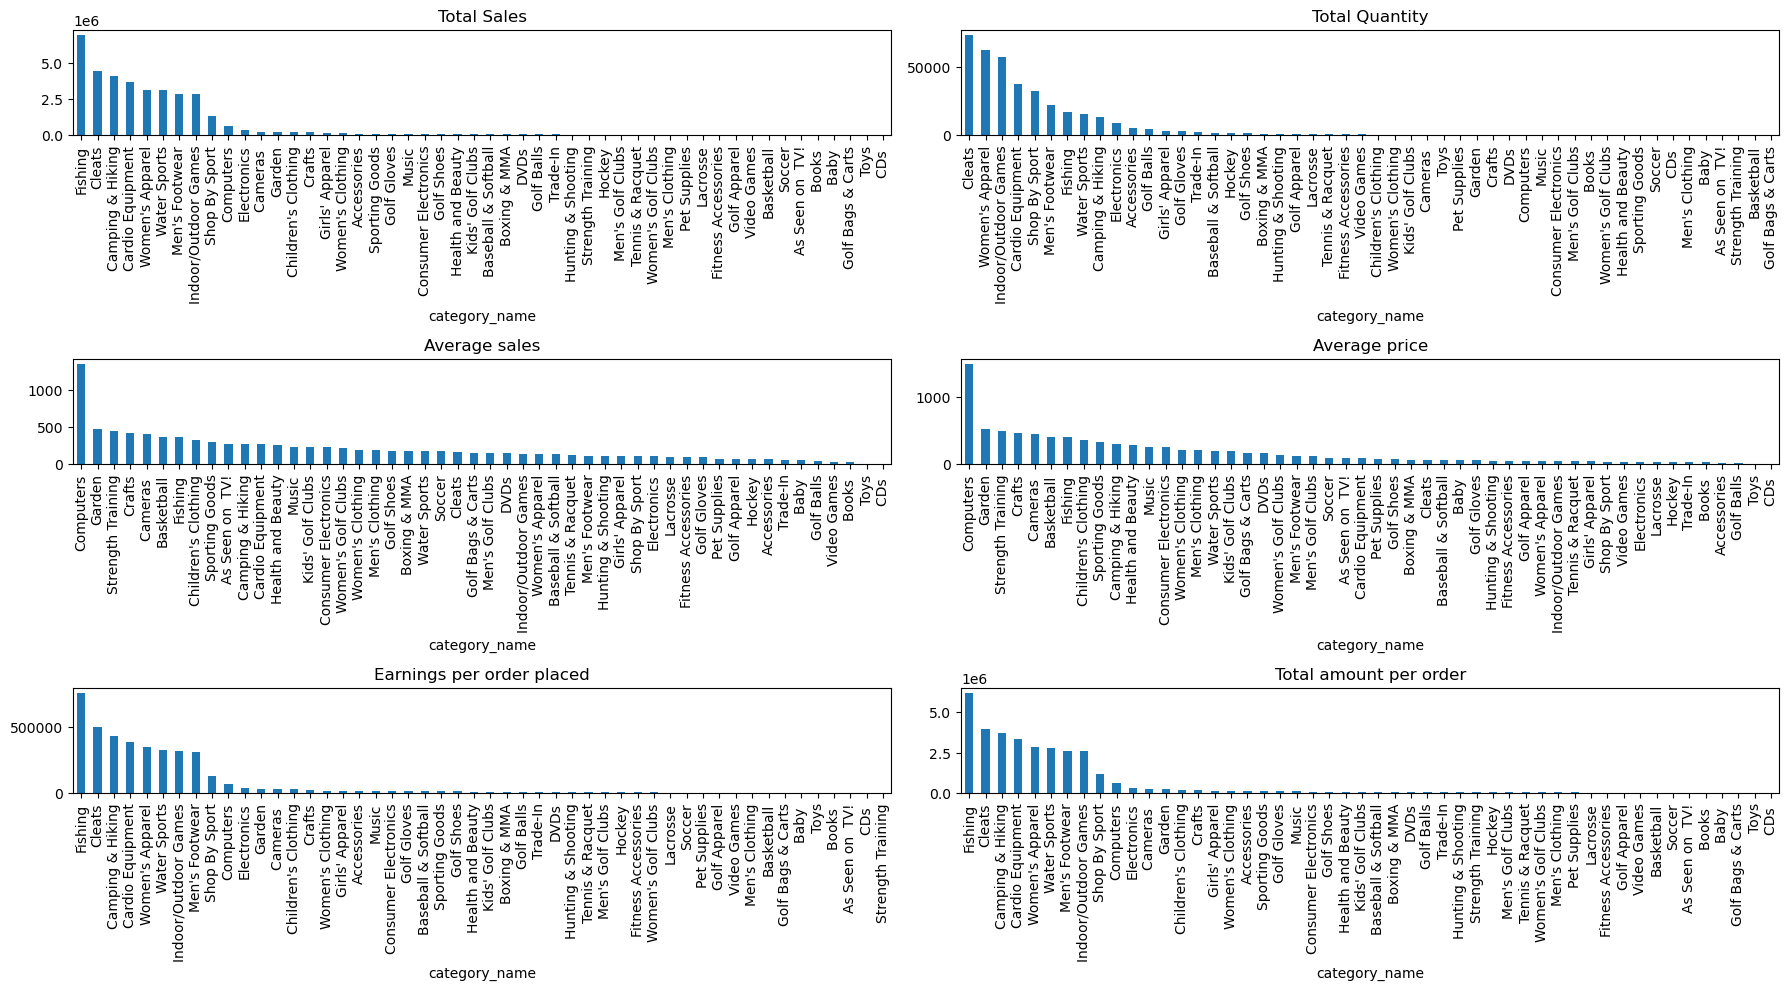

In [22]:
plt.figure(figsize=(10,12))
plt.subplot(6, 2, 1)
Category['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Sales")

plt.subplot(6, 2, 2)
Category['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Quantity")

plt.subplot(6, 2, 3)
Category['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average sales")

plt.subplot(6, 2, 4)
Category['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average price")

plt.subplot(6, 2, 5)
Category['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Earnings per order placed")

plt.subplot(6, 2, 6)
Category['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total amount per order")


plt.tight_layout()
plt.show()

As we can see from Figure 1, the "Fishing" category has the most sales, followed by "Cleatts". However, in the top seven categories with the highest average price, the best-selling category is "Computers" with an average of 1,347 sales. Since the correlation between price and sales was high (0.79), the effect of price on sales of all products should be investigated to determine the trend.

***Revenue vs Late Delivery***

The highest benefit per order is found in certain product categories, demonstrating that purchasing these product categories results in revenue for the company. These top ten product categories, as well as the regions, are depicted in the graphs below.
(The key point is that the count of benefits per order is taken into account for each category of products and regions when plotting the graphs below because, upon closer review of the dataset, I discovered that some product categories have negative profits (losses), so I used the count of benefits per order that is greater than zero rather than the sum of benefits per order.)

Total Revenue with orders 7850450.319819024


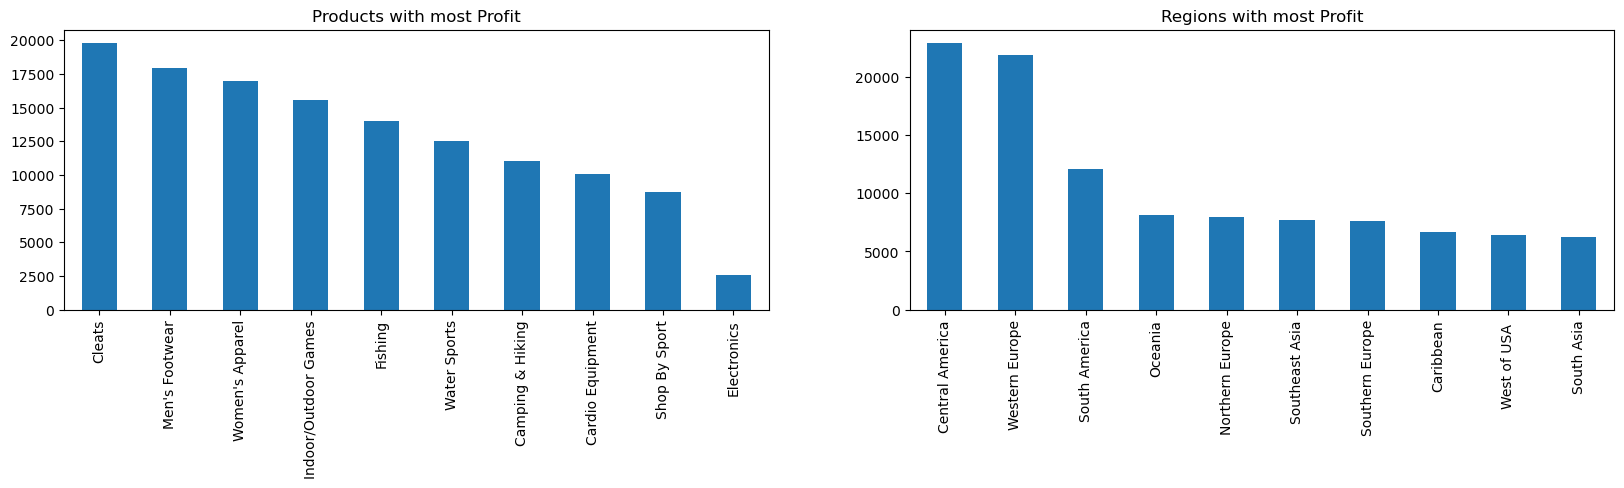

In [23]:
Revenue = SCData[(SCData['benefit_per_order']>0)]
plt.figure(figsize=(10,12))
plt.subplot(2, 2, 1)
Revenue['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most Profit")
plt.subplot(2, 2, 2)
Revenue['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most Profit")
print('Total Revenue with orders',Revenue['benefit_per_order'].sum())#Sum of total sales which are Profit

According to the previous section, where were obtained the products and regions with the most profit, it is critical to understand which products or regions have the largest risk of delivery late in each order because the delay will result in a loss of revenue for the company.

<Axes: title={'center': 'Top 10 Regions with most Late Deliveries'}>

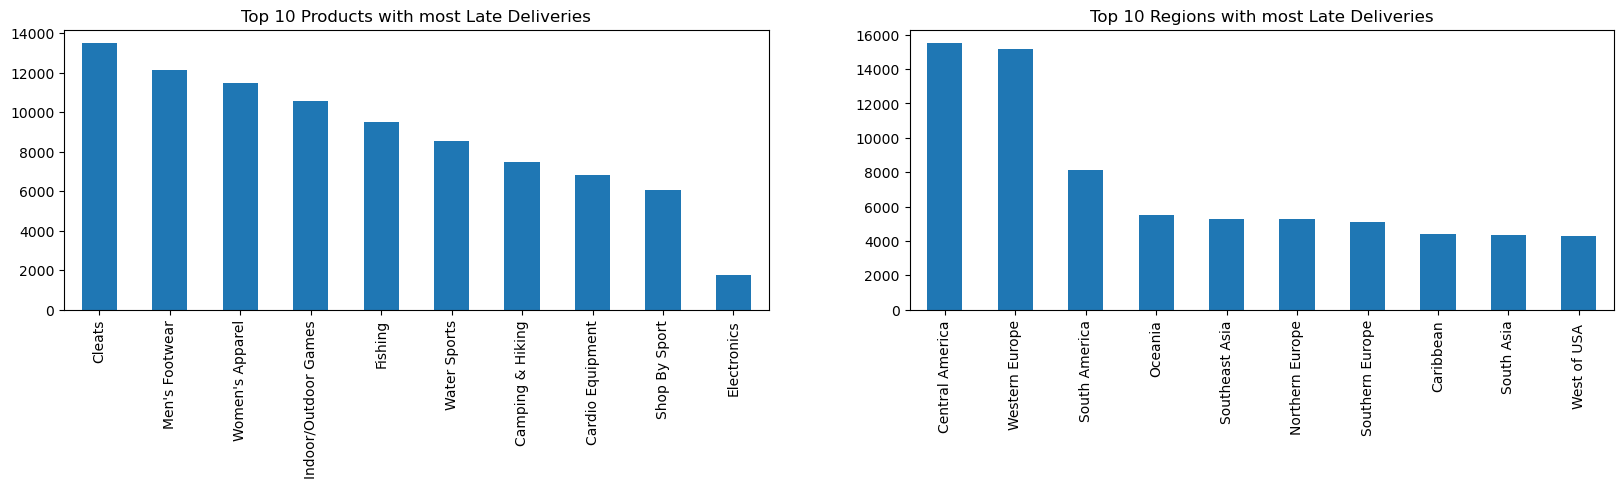

In [24]:
late_delivery = SCData[(SCData['delivery_status'] == 'Late delivery')]#Filtering columns with late delivery status
plt.figure(figsize=(10,12))
plt.subplot(2, 2, 1)
late_delivery['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Products with most Late Deliveries")#Top 10 products with most late deliveries
plt.subplot(2, 2, 2)
late_delivery['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Regions with most Late Deliveries")#Top 10regions with most late deliveries

It can be concluded that the top 10 products and regions that have the highest profit are facing the risk of delivery delays. By using a better shipping method, the company can send products more quickly and prevent delivery delays. With detailed delivery planning, customers already know when the products will arrive. It can also consider depots for these regions to reduce delivery time.

### Shipping Modes 

In [25]:
data_Shippment=SCData.groupby(['shipping_mode'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Shippment, values='order_item_quantity', names= 'shipping_mode' , title= 'Shippment Modes', 
       color='shipping_mode',
             color_discrete_map={'First Class':'darkblue',
                                 'Same Day':'cyan',
                                 'Second Class':'magenta',
                              'Standard Class':'green'})

In this Pie Chart, it is clear that Standard Class is the majority of shipping mode among the others, while Same Day shipping mode only shares a small portion. so can be concluded that customers tend to use the shipping method at a lower price.

### Delivery Status

In [26]:
data_Delivery=SCData.groupby(['delivery_status'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Delivery, values='order_item_quantity', names= 'delivery_status' , title= 'Delivery Status', 
       color='delivery_status',
             color_discrete_map={'Advance shipping':'blue',
                                 'Late delivery':'red',
                                 'Shipping canceled':'yellow',
                              'Shipping on time':'green'})

In this graph, it is clear that late delivery has the highest share while shipping on time accounts for only about 18%. Late delivery not only has cost implications but can also damage a company's reputation. Loss of credit leads to the loss of existing customers and the failure to attract new ones.

***Delivery status by Shipping mode***

In [27]:
SCData["late_days"] = SCData.days_for_shipping_real - SCData.days_for_shipment_scheduled
total = SCData.groupby("shipping_mode", as_index = False).agg(count = ("shipping_mode", "count"))
total

ship_mode = SCData.groupby(["shipping_mode", "delivery_status"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))

ship_mode = ship_mode.merge(total, on = "shipping_mode", how = "left")
ship_mode.rename(columns={'count': 'total_number'}, inplace=True)
ship_mode["percentage"] = ship_mode.number/ship_mode.total_number*100

x = ["First Class", "Same Day", "Second Class", "Standard Class"]
for y in x:
    mask = ship_mode[ship_mode["shipping_mode"] == y]
    mask = mask.pivot(index='shipping_mode', columns='delivery_status', values=['percentage'])
    exec(f"{y.lower().replace(' ', '_')} = mask")

ship_mode_graph = pd.concat([first_class, second_class, standard_class, same_day])

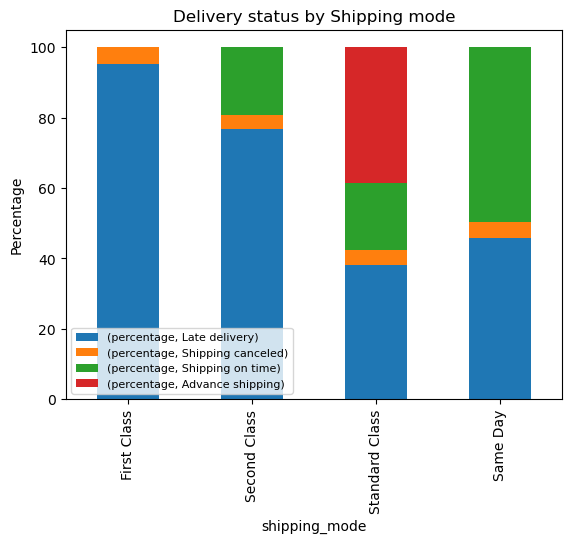

In [28]:
ship_mode_graph.plot(kind='bar', stacked=True)
plt.xlabel('shipping_mode')
plt.ylabel('Percentage')
plt.title('Delivery status by Shipping mode')
plt.legend(loc='lower left', prop={'size': 8})

The stacked bar chart shows the poor performance of all shipping modes. Almost 55% of orders are delivered late. For First Class items, the late delivery rate is about 95%; for Second Class orders, it is 77%. Late delivery can noticeably negatively impact customer satisfaction, company image, and cash flow. Additionally, it has a significant impact on a company's ability to retain customers because unsatisfied customers are much more likely to switch to rival companies.

***Late Delivery Risk***

<Axes: xlabel='days_for_shipment_scheduled', ylabel='days_for_shipping_real'>

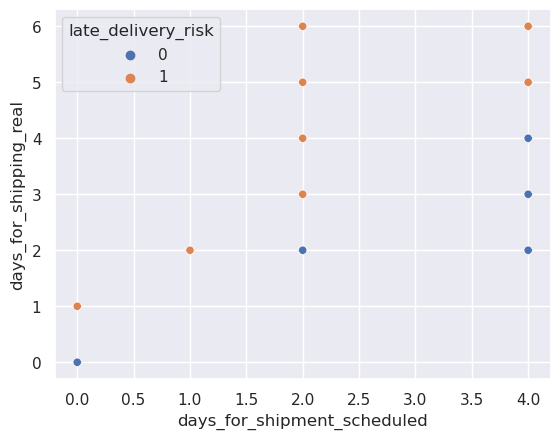

In [29]:
sns.set()
sns.scatterplot(x="days_for_shipment_scheduled",y="days_for_shipping_real",hue="late_delivery_risk",data=SCData)

According to the chart, the orders that were scheduled to be delivered in 2 days have the highest delay. By analysing the dataset, 2-day deliveries are related to Second Class shipping modes. As a result, the highest amount of delay in delivery is related to the Second Class. Shipping Modes (Days for shipment scheduled):

Standard Class (4 Days) Second Class (2 Days) First Class (1 Day) Same Day (0 Day)

### Payment Methods

In [30]:
data_Payment=SCData.groupby(['type'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Payment, values='order_item_quantity', names= 'type' , title= 'Payment Methods', 
       color='type',
             color_discrete_map={'CASH':'darkblue',
                                 'DEBIT':'magenta',
                                 'PAYMENT':'green',
                              'TRANSFER':'yellow'})

The graph shows that customers typically select debit as their first preferred payment method, with transfer coming in second (27.6%). By analysing the dataset, it was found that 8% of the orders made through transfer were suspected of fraud.
Considering that the performance of the company's supply chain is not satisfactory, if the payment system is not reviewed, the financial flow of the company will face problems in the long term and the company will incur losses.

# Ordinary Least Squares

Simple linear regression is a Total amount per order (Sales per customer) forecasting method that focuses on analyzing relationships between several quantitative variables (Grzegorzek,2023) such as sales value, order quantity, product price, customer type, and market segment. Accurate sales forecasting will help the company meet consumer demand.

Ordinary least squares (OLS) regression is a method for determining a line that best describes the relationship between predictor variables and a response variable. Estimating the relationship between the observations can assist the company in making predictions and strategic decisions in order to prevent supply shortages.

Predictor variables :'order_item_product_price','order_country','order_item_discount', 'order_profit_per_order','order_item_quantity','delivery_status','customer_country','customer_state','order_city','customer_city','department_name','order_state', 'order_status', 'market','type','product_name','customer_segment','order_region','category_name','shipping_mode'

Response variable: Total amount per order ( 'order_item_total')

### OLS Regression 

The data in some columns is of the object type, which cannot be used in the regression model. One option is to not include the column corresponding to this data, but since customer category, market, product_name,order_region, category_name, etc. might affect the Total amount per order, the object types below are converted to the "int" type using the following library and code:

In [31]:
reg_SC = SCData.copy()

In [32]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
reg_SC['market']= le.fit_transform(reg_SC['market'])#convert the categorical columns into numeric
reg_SC['type']= le.fit_transform(reg_SC['type'])
reg_SC['product_name']= le.fit_transform(reg_SC['product_name'])
reg_SC['customer_segment']= le.fit_transform(reg_SC['customer_segment'])
reg_SC['order_region']= le.fit_transform(reg_SC['order_region'])
reg_SC['category_name']= le.fit_transform(reg_SC['category_name'])
reg_SC['shipping_mode']= le.fit_transform(reg_SC['shipping_mode'])
reg_SC['delivery_status']= le.fit_transform(reg_SC['delivery_status'])
reg_SC['customer_country']  = le.fit_transform(reg_SC['customer_country'])
reg_SC['customer_state']= le.fit_transform(reg_SC['customer_state'])
reg_SC['order_city'] = le.fit_transform(reg_SC['order_city'])
reg_SC['customer_city']= le.fit_transform(reg_SC['customer_city'])
reg_SC['department_name']= le.fit_transform(reg_SC['department_name'])
reg_SC['order_state'] = le.fit_transform(reg_SC['order_state'])
reg_SC['order_status'] = le.fit_transform(reg_SC['order_status'])
reg_SC['order_country']= le.fit_transform(reg_SC['order_country'])

In [33]:
reg_SC['Intercept'] = 1

In [34]:
independants=reg_SC[['Intercept',
       'order_item_product_price','order_country','order_item_discount',
      'order_profit_per_order','order_item_quantity','delivery_status','customer_country','customer_state','order_city','customer_city','department_name','order_state','order_status',
'market','type','product_name','customer_segment','order_region','category_name','shipping_mode']]
ols_model = sm.OLS(reg_SC['order_item_total'], independants)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       order_item_total   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.043e+05
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:47:20   Log-Likelihood:            -8.9208e+05
No. Observations:              180519   AIC:                         1.784e+06
Df Residuals:                  180498   BIC:                         1.784e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -35.4732      0.637    -55.714      0.000     -36.721     -34.225
order_item_product_price     0.9688      0.001   1070.831      0.000       0.967       0.971
order_country               -0.0022      0.002     -1.075      0.282      -0.006       0.002
order_item_discount         -0.6025      0.005   -132.234      0.000      -0.611      -0.594
order_profit_per_order       0.0120      0.001     15.571      0.000       0.010       0.013
order_item_quantity         53.7354      0.071    751.562      0.000      53.595      53.876
delivery_status              0.0821      0.082      1.001      0.317      -0.079       0.243
customer_country             0.0980      0.231      0.423      0.672      -0.356       0.552
customer_state               0.0065      0.008      0.846      0.397      -0.009       0.021
order_city                4.667e-05   8.22e-05      0.568      0.570      -0.000       0.000
customer_city                0.0009      0.001      1.541      0.123      -0.000       0.002
department_name             -1.2469      0.034    -36.701      0.000      -1.313      -1.180
order_state              -9.184e-05      0.000     -0.338      0.735      -0.001       0.000
order_status                -0.0678      0.060     -1.135      0.256      -0.185       0.049
market                      -0.4648      0.071     -6.502      0.000      -0.605      -0.325
type                         0.0599      0.136      0.441      0.659      -0.206       0.326
product_name                 0.0320      0.004      7.565      0.000       0.024       0.040
customer_segment            -0.0677      0.105     -0.647      0.517      -0.273       0.137
order_region                -0.0057      0.012     -0.472      0.637      -0.029       0.018
category_name               -0.6523      0.006   -105.529      0.000      -0.664      -0.640
shipping_mode                0.0607      0.073      0.835      0.404      -0.082       0.203
==============================================================================
Omnibus:                    70854.355   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           845376.317
Skew:                           1.554   Prob(JB):                         0.00
Kurtosis:                      13.136   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1-I examined the p-value for predictor variables. To decide on the retention of a predictor variable in the model, its p-value must be less than 0.05 which means that the test hypothesis is false or should be rejected.

2-If the p-value is less than 0.05, it can be said that there is a statistically significant relationship between these predictor variables and 'order_item_total' (response variable).  *'order_item_product_price','order_item_discount','order_item_quantity','order_profit_per_order','department_name','market','product_name','category_name'*

3-If the p-value is greater than 0.05 for the predictor variables, it means that no effect was observed. So this variable does not affect 'order_item_total' (response variable). These variables are as follows;
*'order_country', 'customer_country','customer_state','order_city','customer_city', 'order_status', 'order_state', 'type','customer_segment', 'order_region', 'shipping_mode', and 'delivery_status'*

4-I performed the OLS regression model again by removing the predictor variables that had a p-value above 0.05.

In [35]:
independants=reg_SC[['Intercept',
       'order_item_product_price','order_item_discount',
       'order_item_quantity','order_profit_per_order','department_name',
'market','product_name','category_name']]
ols_model = sm.OLS(reg_SC['order_item_total'], independants)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       order_item_total   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.607e+05
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:47:21   Log-Likelihood:            -8.9208e+05
No. Observations:              180519   AIC:                         1.784e+06
Df Residuals:                  180510   BIC:                         1.784e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -35.2640      0.419    -84.072      0.000     -36.086     -34.442
order_item_product_price     0.9688      0.001   1071.213      0.000       0.967       0.971
order_item_discount         -0.6024      0.005   -132.227      0.000      -0.611      -0.594
order_item_quantity         53.7350      0.071    751.644      0.000      53.595      53.875
order_profit_per_order       0.0120      0.001     15.569      0.000       0.010       0.013
department_name             -1.2470      0.034    -36.711      0.000      -1.314      -1.180
market                      -0.4478      0.069     -6.456      0.000      -0.584      -0.312
product_name                 0.0319      0.004      7.551      0.000       0.024       0.040
category_name               -0.6523      0.006   -105.537      0.000      -0.664      -0.640
==============================================================================
Omnibus:                    70864.551   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           845643.849
Skew:                           1.555   Prob(JB):                         0.00
Kurtosis:                      13.137   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1- As it is clear in the results of OLS regression, the p-value of independent variables is 0, so all these independent variables remain in the model.

2-R2 is how well the regression model explains observed data. According to the value of R2 is 0.92, I can say that the line that was fitted is the best.

3-The adjusted R-squared shows whether adding additional predictors improve a regression model or not. Adjusted R2 is always less than or equal to R2. In this case, Adjusted R2 is 0.92, so I can result that the line that was fitted is the best.

4-The F-statistic (2.607e+05) and the corresponding p-value (Prob (F-statistic):0.00) show the overall significance of the regression model, that is, whether predictor variables in the model are useful for explaining the variation in the response variable.

Since the p-value in this case is less than 0.05,  the model is statistically significant and the 'order_item_product_price','order_item_discount','order_item_quantity','order_profit_per_order','department_name','market','product_name','category_name' are deemed to be useful for explaining the variation in 'order_item_total'.

5-Considering that both fitted regression lines have equal R2 values, in this case, an F-test can be conducted to see which model is statistically better.

6-Regression Line 1 yields an F-statistic of 1.043e+05 and a Prob (F-statistic) of 0.00.
    
   Regression Line 2 yields an F-statistic of 2.607e+05 and a Prob (F-statistic) of 0.00.
     
   Since the F-statistic of the second regression line is higher than the first regression line, I concluded that the second regression line fitted is the best line. 

#### Linear Regression Equation
From the coef column can see the regression coefficients and can write the following fitted regression equation is:

***order_item_total= -35.2640+(0.9688× order_item_product_price)+(53.7350 × order_item_quantity)+(-0.6024× order_item_discount)+(-0.4478×market)+(0.0319×product_name)+(-0.6523×category_name)+(0.0120×order_profit_per_order)+(-1.2470×department_name)***

1.There is a Positive correlation between the Total amount per order, product price, quantity, product, and profit per order. This indicates that the Total amount per order increases by the coefficient for each of these predictor variables.

2.There is a Negative correlation between the Total amount per order, discount per order, market, category, and department. This indicates that the total amount per order reduces by the coefficient for each of these predictor variables.

The reason for negative correlation:

2.1. It is clear that the value of the total amount per order is obtained from the difference between the sales amount and the discount.

Order Item Total = Sales - Order Item Discount


2.2. According to the data set, Europe and LATAM markets have the most discounts. Therefore, the reason for the high sales in these markets is due to the many discounts that the company gives to the customers in these markets.

2.3. The seven categories with the highest sales—Fishing, Cleats, Camping & Hiking, Cardio Equipment, Women's Apparel, Water Sports, and Men's Footwear—also had the largest discounts. As a result, the high discount has caused more sales of these products.

2.4. The Fan Shop department, which has the most sales, also has the most discounts. Therefore, the company has increased its sales by giving more discounts in this department.

So, the regression line has correctly recognised the negative relationship between the market, category, and department and the Total amount per order.

##### Visualize the Regression Line for each predictor variables

Text(0.5, 0, 'Order Profit Per Order')

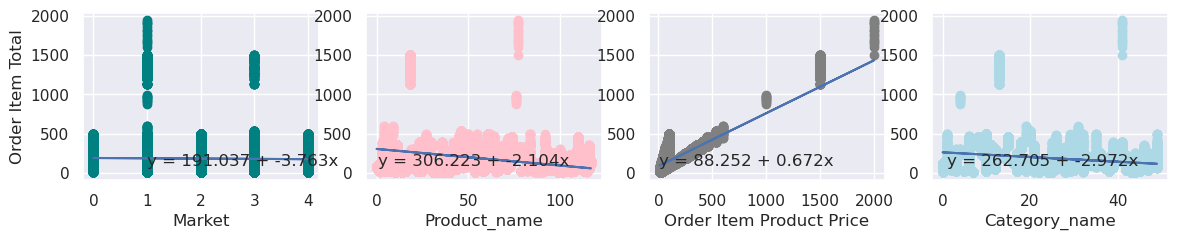

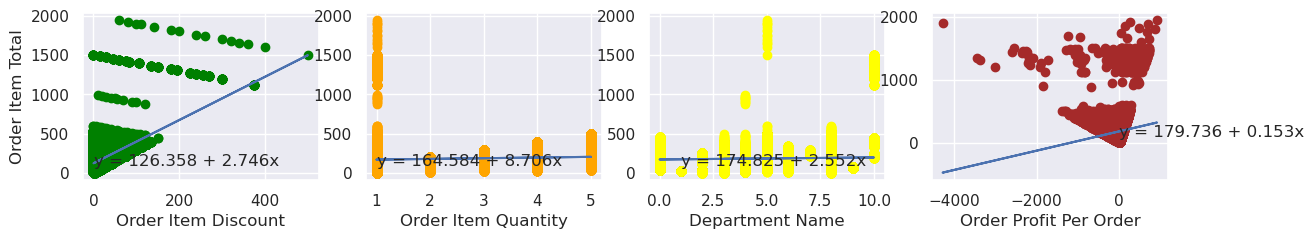

In [36]:
plt.figure(figsize=(14,10))
plt.subplot(4, 4, 1)
a, b = np.polyfit(reg_SC['market'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['market'], reg_SC['order_item_total'], color='teal')#add points to plot
plt.plot(reg_SC['market'], a*reg_SC['market']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Market')#add axis labels
plt.ylabel('Order Item Total')


plt.subplot(4, 4, 2)
a, b = np.polyfit(reg_SC['product_name'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['product_name'], reg_SC['order_item_total'], color='pink')#add points to plot
plt.plot(reg_SC['product_name'], a*reg_SC['product_name']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Product_name')#add axis labels


plt.subplot(4, 4, 3)
a, b = np.polyfit(reg_SC['order_item_product_price'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['order_item_product_price'], reg_SC['order_item_total'], color='grey')#add points to plot
plt.plot(reg_SC['order_item_product_price'], a*reg_SC['order_item_product_price']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Order Item Product Price')#add axis labels


plt.subplot(4,4, 4)
a, b = np.polyfit(reg_SC['category_name'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['category_name'], reg_SC['order_item_total'], color='lightblue')#add points to plot
plt.plot(reg_SC['category_name'], a*reg_SC['category_name']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Category_name')#add axis labels

plt.figure(figsize=(14,10))
plt.subplot(4, 4, 1)
a, b = np.polyfit(reg_SC['order_item_discount'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['order_item_discount'], reg_SC['order_item_total'], color='green')#add points to plot
plt.plot(reg_SC['order_item_discount'], a*reg_SC['order_item_discount']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Order Item Discount')#add axis labels
plt.ylabel('Order Item Total')

plt.subplot(4, 4, 2)
a, b = np.polyfit(reg_SC['order_item_quantity'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['order_item_quantity'], reg_SC['order_item_total'], color='orange')#add points to plot
plt.plot(reg_SC['order_item_quantity'], a*reg_SC['order_item_quantity']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Order Item Quantity')#add axis labels

plt.subplot(4,4, 3)
a, b = np.polyfit(reg_SC['department_name'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['department_name'], reg_SC['order_item_total'], color='yellow')#add points to plot
plt.plot(reg_SC['department_name'], a*reg_SC['department_name']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Department Name')#add axis labels

plt.subplot(4, 4, 4)
a, b = np.polyfit(reg_SC['order_profit_per_order'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['order_profit_per_order'], reg_SC['order_item_total'], color='brown')#add points to plot
plt.plot(reg_SC['order_profit_per_order'], a*reg_SC['order_profit_per_order']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Order Profit Per Order')#add axis labels

***Business Perspective:***

Correlation can help a company increase future sales through demand and resource planning. As it is clear from the fitted regression line, instead of improving the shipment situation and planning carefully for delivery to satisfy the customer and increase their demand, which in turn increases the profit, the company encourages the customer to order with large amounts of discounts.

# Data Modelling

## Regression Models for Order Item Quantity

Demand (Order Item Quantity) forecasting enables company to make more informed supply decisions that estimate total sales and revenue for the future. Regression models can find patterns, recognise demand indications, and identify correlations between variables in large datasets. According to a   [McKinsey](#4) ML-based supply chain solutions can cut prediction mistakes by up to 50%.

The regression models used are Random Forest regression, Decision Tree Regression, and Linear Regression to predict "Order Item Quantity" which are compared with mean absolute error (MAE) and root mean square error (RMSE).

In [37]:
train_SC = SCData.copy()

The data in some columns is of the object type, which cannot be used in the regression model. One option is to remove the column corresponding to this data, but since customer category, market, product name,order region, category name, etc. might affect the Order Item Quantity, removing these columns creates a poor model. So all object types are converted to the 'int' type using the following library and code:

In [38]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
train_SC['customer_country']  = le.fit_transform(train_SC['customer_country'])#convert the categorical columns into numeric
train_SC['market']= le.fit_transform(train_SC['market'])
train_SC['delivery_status']= le.fit_transform(train_SC['delivery_status'])
train_SC['type']= le.fit_transform(train_SC['type'])
train_SC['product_name']= le.fit_transform(train_SC['product_name'])
train_SC['customer_segment']= le.fit_transform(train_SC['customer_segment'])
train_SC['customer_state']= le.fit_transform(train_SC['customer_state'])
train_SC['order_region']= le.fit_transform(train_SC['order_region'])
train_SC['order_city'] = le.fit_transform(train_SC['order_city'])
train_SC['category_name']= le.fit_transform(train_SC['category_name'])
train_SC['customer_city']= le.fit_transform(train_SC['customer_city'])
train_SC['department_name']= le.fit_transform(train_SC['department_name'])
train_SC['order_state'] = le.fit_transform(train_SC['order_state'])
train_SC['order_status'] = le.fit_transform(train_SC['order_status'])
train_SC['shipping_mode']= le.fit_transform(train_SC['shipping_mode'])
train_SC['order_country']= le.fit_transform(train_SC['order_country'])
train_SC['customer_full_name']= le.fit_transform(train_SC['customer_full_name'])

Since the 'shipping_date_dateorders' and 'order_date_dateorders' do not affect the modelling, I dropped them.

In [39]:
train_SCData=train_SC.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [40]:
xorderitemquantity=train_SCData .loc[:, train_SCData .columns !='order_item_quantity']
yorderitemquantity=train_SCData['order_item_quantity']
xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)

MinMax scaler is used to standardize data since data type is regression.

In [41]:
scaler=MinMaxScaler()
xorderitemquantity_train=scaler.fit_transform(xorderitemquantity_train)
xorderitemquantity_test=scaler.transform(xorderitemquantity_test)

In [42]:
def regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test):
    model_orderitemquantity=model_orderitemquantity.fit(xorderitemquantity_train,yorderitemquantity_train)#Fitting train data for Number of products per order
  
    yorderitemquantity_pred=model_orderitemquantity.predict(xorderitemquantity_test)#predicting Number of products per order with test data
   
    print('Model parameter used are:',model_orderitemquantity) #Printing the model to see which parameters are used
   
    print("MAE of Total amount per order is         :", metrics.mean_absolute_error(yorderitemquantity_test,yorderitemquantity_pred))  #Printing mean absolute error for predicting Number of products per order
    
    print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(yorderitemquantity_test,yorderitemquantity_pred)))#Printing Root mean squared error for predicting Number of products per order

### Linear Regression 

In [43]:
model_orderitemquantity=LinearRegression()
regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)

Model parameter used are: LinearRegression()
MAE of Total amount per order is         : 0.3383499587583299
RMSE of Total amount per order is        : 0.5253541828812084


RMSE means a measure of how far data points from the regression line whose value is 0.525351, and MAE measures the average magnitude of the error without considering the directions between the actual and prediction observation which value is 0.338233.

### Decision Tree Regression

In [44]:
model_orderitemquantity = tree.DecisionTreeRegressor()
regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)

Model parameter used are: DecisionTreeRegressor()
MAE of Total amount per order is         : 0.0
RMSE of Total amount per order is        : 0.0


RMSE means a measure of how far data points from the regression line whose value is 0.011369, and MAE measures the average magnitude of the error without considering the directions between the actual and prediction observation which value is 0.000129.

### Random Forest Regression

In [45]:
model_orderitemquantity = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of Total amount per order is         : 6.961370854568278e-05
RMSE of Total amount per order is        : 0.005675930784035329


RMSE means a measure of how far data points from the regression line whose value is 0.005676, and MAE measures the average magnitude of the error without considering the directions between the actual and prediction observation which value is 0.000070.

 ### Models Evaluation

In [46]:
Regression_data = {'Regression Model':  ['Linear Regression','Decision tree','Random Forest'],
        'MAE' :        [ 0.33823326548125476,0.00012925622276386734,6.961370854568278e-05],
        'RMSE':        [ 0.5253505269286439,0.01136909067445006,0.005675930784035329]}
Regression_comparision = pd.DataFrame (Regression_data, columns = ['Regression Model','MAE','RMSE'])
Regression_comparision

,Regression Model,MAE,RMSE
0,Linear Regression,0.338233,0.525351
1,Decision tree,0.000129,0.011369
2,Random Forest,0.000070,0.005676


The model selection criterion is based on the minimum values of MAE and RMSE. In this scenario, ***Random Forest*** outperforms the Decision Tree since it is an ensemble learning approach that fits several of the decision tree on different subsamples of the dataset and utilises averaging to increase forecast accuracy and control over-fitting.
Also, Random Forest outperforms Linear Regression since some of the features are categorical and some are continuous. Random Forest can accurately divide the data based on categorical Variables and, unlike Linear Regression, it estimates values outside the observed range from existing observations. 

***Business Perspective:***

Demand (Order Item Quantity) forecasting is an important part of supply chain management. The company must forecast actual future demand for production planning, purchasing decisions, and capital cost minimization. Accurate demand forecasting can lead to increased customer satisfaction and significant financial savings.Therefore, it is very important to choose the right regression model that can provide the most accurate demand forecast.

# Classification Models for Late Delivery

The classification models used in this project are Logistic Regression, Linear Discriminant Analysis, Gaussian Naive Bayes, Support Vector Machines, and Random Forest classification to predict "Late Delivery" based on on  accuracy, recall and F1 score metrics. 

**Metrics:**

TP: The model correctly predicts that "Late Delivery" will occur. This allows the company's supply chain to prepare for such an outcome early enough to mitigate the effects.

TN: The model correctly predicts that the "Late Delivery" will not occur. 

FP: The model incorrectly predicts that the "Late Delivery" will occur.This signifies that reduction resources have been wasted.

FN: The model incorrectly predicts that the "Late Delivery" will not occur. This might be the most undesirable consequence since the "Late Delivery" prediction goal is not met. (Nguyen,2020)


The model with the highest score of F1 is selected in this report ;

*F1 Score = (2 * Precision * Recall) / (Precision + Recall)*

where:

Precision: Correct positive predictions relative to total positive predictions

Recall: Correct positive predictions relative to total actual positives

In [47]:
train_DataSC = SCData.copy()

New column is created for orders with "Late Delivery" making it into binary classification

In [48]:
train_DataSC['late_delivery']=np.where(train_DataSC['delivery_status'] == 'Late delivery', 1, 0) 

In [49]:
train_dataSC=train_DataSC.drop(['delivery_status','late_delivery_risk'], axis=1) #Dropping columns with repeated values

As it was said in the regression model, the data in some columns is of object type; since these columns have an effect on classification models for Late Delivery, all object types are changed to 'int' type using the following library and code:

In [50]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
train_dataSC['customer_country']  = le.fit_transform(train_dataSC['customer_country'])#convert the categorical columns into numeric
train_dataSC['market']= le.fit_transform(train_dataSC['market'])
train_dataSC['type']= le.fit_transform(train_dataSC['type'])
train_dataSC['product_name']= le.fit_transform(train_dataSC['product_name'])
train_dataSC['customer_segment']= le.fit_transform(train_dataSC['customer_segment'])
train_dataSC['customer_state']= le.fit_transform(train_dataSC['customer_state'])
train_dataSC['order_region']= le.fit_transform(train_dataSC['order_region'])
train_dataSC['order_city'] = le.fit_transform(train_dataSC['order_city'])
train_dataSC['category_name']= le.fit_transform(train_dataSC['category_name'])
train_dataSC['customer_city']= le.fit_transform(train_dataSC['customer_city'])
train_dataSC['department_name']= le.fit_transform(train_dataSC['department_name'])
train_dataSC['order_state'] = le.fit_transform(train_dataSC['order_state'])
train_dataSC['order_status'] = le.fit_transform(train_dataSC['order_status'])
train_dataSC['shipping_mode']= le.fit_transform(train_dataSC['shipping_mode'])
train_dataSC['order_country']= le.fit_transform(train_dataSC['order_country'])
train_dataSC['customer_full_name']= le.fit_transform(train_dataSC['customer_full_name'])

Since the 'shipping_date_dateorders' and 'order_date_dateorders' do not affect the modelling, I dropped them.

In [51]:
train_dataSCM=train_dataSC.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [52]:
xlatedelivery=train_dataSCM .loc[:, train_dataSCM .columns != 'late_delivery']
ylatedelivery=train_dataSCM['late_delivery']
xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test = train_test_split(xlatedelivery,ylatedelivery,test_size = 0.3, random_state = 42)

I used the standard scaler to standardize the data.

In [53]:
sc = StandardScaler()
xlatedelivery_train=sc.fit_transform(xlatedelivery_train)
xlatedelivery_test=sc.transform(xlatedelivery_test)

The models are evaluated using accuracy, recall, F1 score metrics since the output is in binary classification format. The F1 score is the primary metric used to measure the performance of different models.

In [54]:
def classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test):
    model_latedelivery=model_latedelivery.fit(xlatedelivery_train,ylatedelivery_train) # Fitting train data for predection of late delivery
    ylatedelivery_pred=model_latedelivery.predict(xlatedelivery_test)  
    accuracy_latedelivery=accuracy_score(ylatedelivery_pred, ylatedelivery_test) #Accuracy for predection of late delivery
    recall_latedelivery=recall_score(ylatedelivery_pred, ylatedelivery_test)# Recall score for predection of late delivery
    conf_latedelivery=confusion_matrix(ylatedelivery_test, ylatedelivery_pred)#predection of late delivery
    f1_latedelivery=f1_score(ylatedelivery_test, ylatedelivery_pred)#predection of late delivery
    print('Model paramters used are :',model_latedelivery)
    print('Accuracy of late delivery status is:', (accuracy_latedelivery)*100,'%')
    print('Recall score of late delivery status is:', (recall_latedelivery)*100,'%')
    print('F1 score of late delivery status is:', (f1_latedelivery)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_latedelivery))

### Random Forest Classification

In [55]:
model_latedelivery = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 99.44419824211536 %
Recall score of late delivery status is: 98.99820275577447 %
F1 score of late delivery status is: 99.4965797528056 %
Conf Matrix of late delivery status is: 
 [[24110   301]
 [    0 29745]]


Random Forest was the first model I chose since it is an ensemble learning algorithm that fits numerous decision tree classifiers on a range of sub-samples of the dataset and utilises averaging to increase forecast accuracy and control over-fitting. As the result shows, Random Forest achieved the highest F1 (99.49%) and accuracy score (99.44%) for predicting late deliveries.

### Support Vector Machines

In [56]:
model_latedelivery = svm.LinearSVC()
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : LinearSVC()
Accuracy of late delivery status is: 98.2550409926878 %
Recall score of late delivery status is: 96.93305521152467 %
F1 score of late delivery status is: 98.43612954473993 %
Conf Matrix of late delivery status is: 
 [[23470   941]
 [    4 29741]]


The Support Vector Machine is known as an example of a highly performant learner. The SVM predictive model achieved relatively good results across various metrics. The model not only accurately predicted 98.2568% of late deliveries but also led to the second F1 score, with 98.4378% of predictions of late deliveries being correct. 

### Logistic Classification Model

In [57]:
model_latedelivery = LogisticRegression(solver='lbfgs',random_state=0) 
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of late delivery status is: 98.24950144028362 %
Recall score of late delivery status is: 96.93275530493172 %
F1 score of late delivery status is: 98.43108698530386 %
Conf Matrix of late delivery status is: 
 [[23470   941]
 [    7 29738]]


The Logistic Regression method helps prevent shipments from being delayed by predicting events. There will be much better visibility in terms of location, delivery, shipment tracking, and so on. It would not only assist in minimising delivery delays, but it would also eliminate unnecessary charges, providing more opportunities to maximise returns.
The results show that it accurately predicted 98.249% of late deliveries, and the F1 score is 98.431%.

### Linear Discriminant Analysis

In [58]:
model_latedelivery = LinearDiscriminantAnalysis()
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : LinearDiscriminantAnalysis()
Accuracy of late delivery status is: 96.20540660314647 %
Recall score of late delivery status is: 96.25793518209154 %
F1 score of late delivery status is: 96.55634687892753 %
Conf Matrix of late delivery status is: 
 [[23291  1120]
 [  935 28810]]


The results of Linear Discriminant Analysis are slightly worse than the Classification Model and better than the Gaussian Naive Bayes Model, with it correctly predicting 96.205% of late deliveries.

### Gaussian Naive Bayes Model

In [59]:
model_latedelivery = GaussianNB()
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : GaussianNB()
Accuracy of late delivery status is: 94.58416426619397 %
Recall score of late delivery status is: 91.21879227647275 %
F1 score of late delivery status is: 95.28979106778654 %
Conf Matrix of late delivery status is: 
 [[21555  2856]
 [   77 29668]]


Apart from the fact that this model assumes that the distribution function of the variables is Gaussian, the most important assumption that this model considers about the data is that the features are independent of each other and that by changing the values of the features, there is no impact on the other resulting values. Although the accuracy score of this model is 94.58%, according to the correlation matrix, it is not reasonable to assume that the predictor variables are independent of each other.

 ### Models Evaluation

In [60]:
Classification_data = {'Classification Model':  ['Random Forest Classification','Support Vector Machines','Logistic Classification Model',
                                 'Linear Discriminant Analysis','Gaussian Naive Bayes Model'],
       'Accuracy' :        [ 99.44419824211536, 98.25688751015585,98.24950144028362,96.20540660314647, 94.58416426619397],
        'Recall':        [98.99820275577447, 96.93315516735652,96.93275530493172,96.25793518209154,91.21879227647275],
        'F1' :     [99.4965797528056,98.4378102866221,98.43108698530386,96.55634687892753,95.28979106778654],   
        'TN' :        [24110,23470,23470,23291,21555],
        'FP':        [301,941, 941,1120,2856],
        'FN' :     [0,3,7,935,77],
        'TP':     [29745,29742,29738,28810,29668] }
Classification_comparision = pd.DataFrame (Classification_data, columns = ['Classification Model','Accuracy','Recall','F1','TN','FP',
        'FN','TP'])
Classification_comparision 

,Classification Model,Accuracy,Recall,F1,TN,FP,FN,TP
0,Random Forest Classification,99.444198,98.998203,99.496580,24110,301,0,29745
1,Support Vector Machines,98.256888,96.933155,98.437810,23470,941,3,29742
2,Logistic Classification Model,98.249501,96.932755,98.431087,23470,941,7,29738
3,Linear Discriminant Analysis,96.205407,96.257935,96.556347,23291,1120,935,28810
4,Gaussian Naive Bayes Model,94.584164,91.218792,95.289791,21555,2856,77,29668


Although accuracy and recall are considered in evaluating the performance of a model, the F1 score provides a more objective view and fairer evaluation in predicting results. For selecting the best model, the F1 score was used because the results indicate how misleading accuracy can be. For example, in the "Linear Discriminant Analysis," the accuracy score shows that the model is greatly successful, achieving 96.205% accuracy. However, if look at the TP (True Positive) and FN (False Negative) values, the reality is that the best-performing models miss 935 / (28810 + 935) = 3% of late delivery cases.

Considering the F1 score, it is clear that the **Random forest classifier** is performing better for classification type, with an F1 score of 99.49% for late delivery. 

# Conclusion

***Customers' buying behaviours:***

1.After analysing the DataCo Company dataset, it has been discovered that the consumer category has the biggest share. 

2.The customers from the European market make the highest sales and, thus, the highest earnings per order created for the company. In comparison, the customers from LATAM have the highest total quantity of orders. 

3.Cleats, Women's Apparel, Indoor/Outdoor Games, Cardio Equipment, Shop By Sport, Men's Footwear, and Fishing have the largest number of quantities that customers order.

4.Customers tend to use the shipping method at a lower price, so Standard Class is the most popular shipping mode among the others.

5.Customers across all regions tend to favour debit as their preferred payment method, whereas cash payments are the least preferred option.

The gathering of information helps identify areas of shortage and improve ways to add value to both the company and the customer.
The data provides valuable insight into customer demand so that a company's supply chain can develop cost-effective strategies without compromising product quality or customer satisfaction.
****



***Supply chain issues:***

1.By analysing the dataset, it was determined that almost 55% of orders are delivered late. For First Class items, the late delivery rate is about 95%; for Second Class orders, it is 77%. 

2.The highest amount of delay in delivery is related to the Second Class. So,First- and Second-Class shipping modes require improvements in the supply chain to deliver orders on time.

3.Late delivery has the highest share, while Shipping On Time accounts for only about 18%. The critical feature of the supply chain is to provide the products to the customers on time and without delay because if the products are not delivered on time, the customers will be dissatisfied and the company will lose its customers, as well leading to a loss of revenue for the company. 

4.The top 10 products and regions that have the highest profit are facing the risk of delivery delays. For solving this issue ,the company can send products more quickly and prevent delivery delays by using a better shipping method. With detailed delivery planning, customers already know when the products will arrive. It can also consider depots for these regions to reduce delivery time.
***

***Business Perspective:***

Accurately forecasting late deliveries can assist a company in properly managing its supply chain and maximising profitability. If the company is successful in predicting late delivery, it can take measures to avoid sales reductions and obtain a competitive advantage over competitors.
In addition, using machine learning to predict late delivery in the supply chain can have a positive influence on the environment. The number of missed deliveries can be minimised through the late-delay forecasting model, which minimises carbon dioxide emissions. As a result, the company can profit from a supply chain that employs environmentally and socially sustainable practises in order to protect both the customer and the environment.

## References

1- Dataset link : https://data.mendeley.com/datasets/8gx2fvg2k6/5

2- DFreight (2022), How Data Analytics Can Help Improve Your Supply Chain. Available at: https://www.linkedin.com/pulse/how-data-analytics-can-help-improve-your-supply-chain-dfreight/?trk=public_post

3- Nguyen,T. (2020), Machine learning in predicting supply chain risks. Part 3: A case study of an E-commerce enabler. Available at:https://www.linkedin.com/pulse/machine-learning-predicting-supply-chain-risks-part-3-tuan-nguyen-/

4- McKinsey(2017).Smartening up with Artificial Intelligence (AI) - What’s in it for Germany and its Industrial Sector?Available at:https://www.mckinsey.com/~/media/McKinsey/Industries/Semiconductors/Our%20Insights/Smartening%20up%20with%20artificial%20intelligence/Smartening-up-with-artificial-intelligence.ashx

5- Grzegorzek,J. (2023)Simple Linear Regression in Sales Forecasting. Available at:https://www.superbusinessmanager.com/simple-linear-regression-in-sales-forecasting/